<a href="https://colab.research.google.com/github/edersonbadeca/fase5/blob/main/EdersonBadeca_rm560204_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
# carregando o CSV para a memoria e convertendo em um dataset usando pandas Dataframe
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# Plotando as variaveis para explorar mellhor os dados

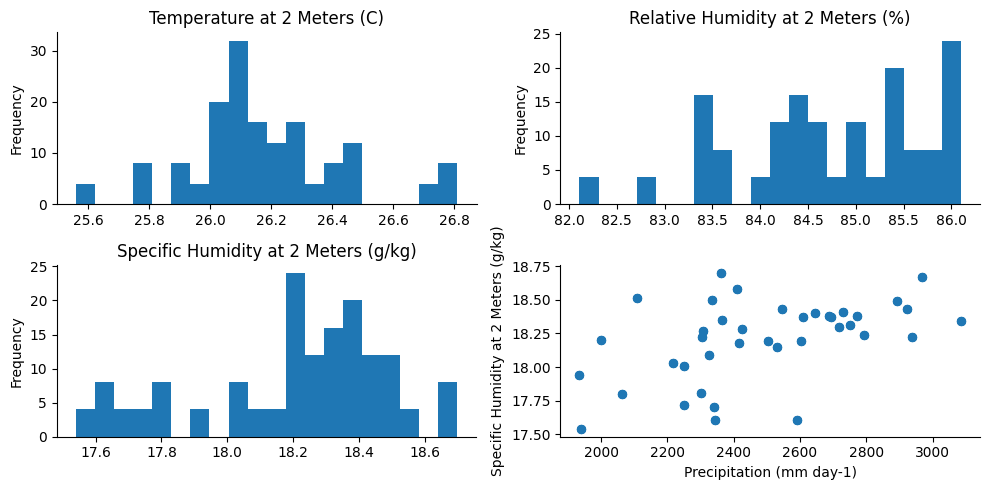

In [66]:
# set to  2x2 to plot all the related features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot 'Temperature at 2 Meters (C)'
df['Temperature at 2 Meters (C)'].plot(kind='hist', bins=20, title='Temperature at 2 Meters (C)', ax=axes[0, 0])
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot 'Relative Humidity at 2 Meters (%)'
df['Relative Humidity at 2 Meters (%)'].plot(kind='hist', bins=20, title='Relative Humidity at 2 Meters (%)', ax=axes[0, 1])
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot 'Specific Humidity at 2 Meters (g/kg)'
df['Specific Humidity at 2 Meters (g/kg)'].plot(kind='hist', bins=20, title='Specific Humidity at 2 Meters (g/kg)', ax=axes[1, 0])
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot 'Precipitation (mm day-1)' vs 'Specific Humidity at 2 Meters (g/kg)'
df.plot(kind='scatter', x='Precipitation (mm day-1)', y='Specific Humidity at 2 Meters (g/kg)', s=32, alpha=.8, ax=axes[1, 1])
axes[1, 1].spines[['top', 'right']].set_visible(False)

# layout adjustments and show the charts
plt.tight_layout()
plt.show()


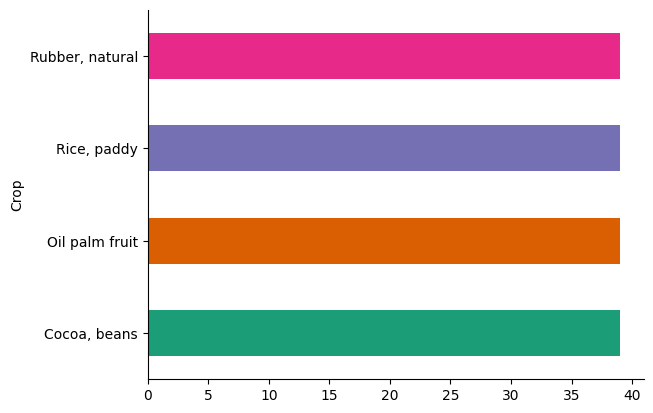

In [67]:
# Display Crop separeted because it is our "Mean" Feature for this exercise

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Crop').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

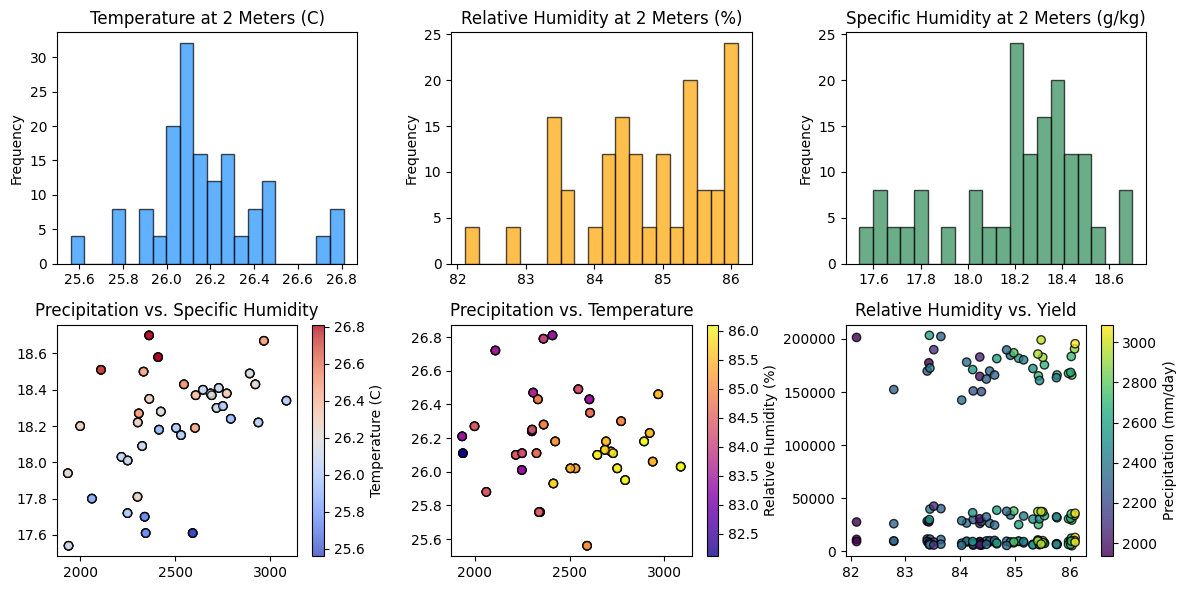

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# The previous chart was boring, lets add some colors to it
df['Temperature at 2 Meters (C)'].plot(kind='hist', bins=20, title='Temperature at 2 Meters (C)',
                                       ax=axes[0, 0], color='dodgerblue', edgecolor='black', alpha=0.7)
df['Relative Humidity at 2 Meters (%)'].plot(kind='hist', bins=20, title='Relative Humidity at 2 Meters (%)',
                                            ax=axes[0, 1], color='orange', edgecolor='black', alpha=0.7)
df['Specific Humidity at 2 Meters (g/kg)'].plot(kind='hist', bins=20, title='Specific Humidity at 2 Meters (g/kg)',
                                               ax=axes[0, 2], color='seagreen', edgecolor='black', alpha=0.7)

# Scatter with color maps
scatter1 = axes[1, 0].scatter(df['Precipitation (mm day-1)'], df['Specific Humidity at 2 Meters (g/kg)'],
                              c=df['Temperature at 2 Meters (C)'], cmap='coolwarm', edgecolors='black', alpha=0.8)
axes[1, 0].set_title('Precipitation vs. Specific Humidity')
fig.colorbar(scatter1, ax=axes[1, 0], label='Temperature (C)')

scatter2 = axes[1, 1].scatter(df['Precipitation (mm day-1)'], df['Temperature at 2 Meters (C)'],
                              c=df['Relative Humidity at 2 Meters (%)'], cmap='plasma', edgecolors='black', alpha=0.8)
axes[1, 1].set_title('Precipitation vs. Temperature')
fig.colorbar(scatter2, ax=axes[1, 1], label='Relative Humidity (%)')

scatter3 = axes[1, 2].scatter(df['Relative Humidity at 2 Meters (%)'], df['Yield'],
                              c=df['Precipitation (mm day-1)'], cmap='viridis', edgecolors='black', alpha=0.8)
axes[1, 2].set_title('Relative Humidity vs. Yield')
fig.colorbar(scatter3, ax=axes[1, 2], label='Precipitation (mm/day)')


plt.tight_layout()
plt.show()

In [69]:
# Describing the dataset to check the data profile
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


# Vamos criar uma matriz de correlação

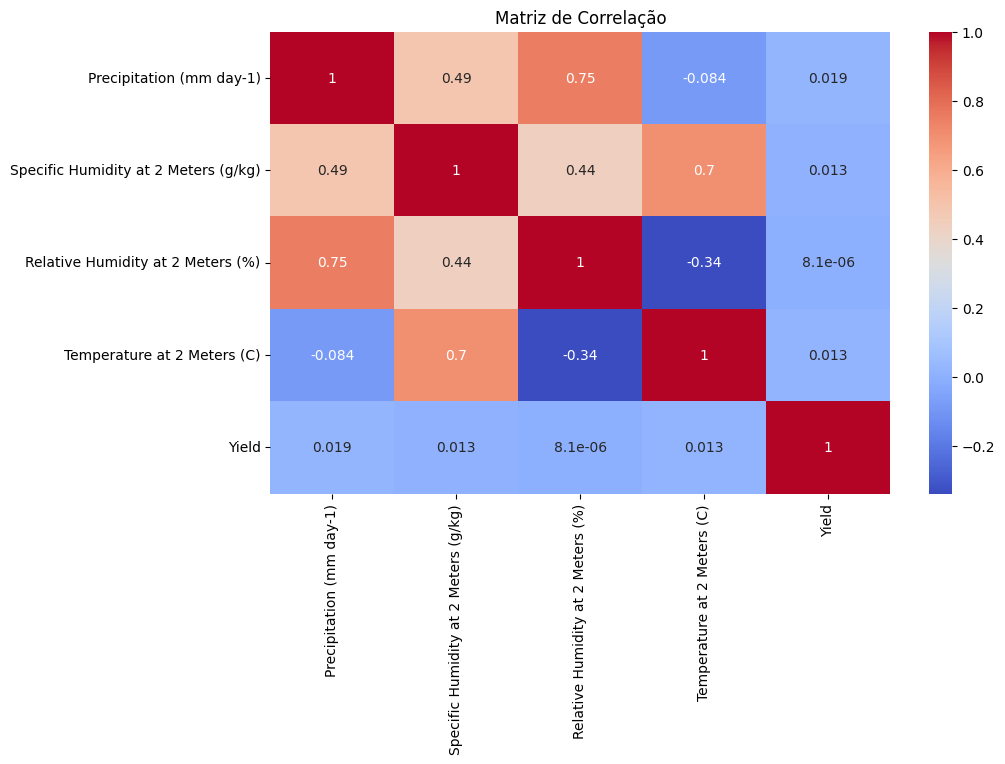

In [70]:
# Selecting the numerical features to append on the correlation matrix
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
# Plotting the result
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# Analise da matrix de Correlação:
Os resultados indicam que a produção agrícola não é fortemente influenciada pelas variáveis climáticas analisadas, sugerindo que outros fatores, como práticas agrícolas, qualidade do solo e insumos, podem ter um impacto mais relevante na produtividade.

Já as relações entre precipitação, umidade relativa e temperatura são consistentes com o comportamento esperado do clima, reforçando a importância de considerar múltiplas variáveis ao analisar padrões meteorológicos e seus impactos na produção agrícola.

### Vamos iniciar os clusters, para este caso vamos escolher a clusterização com o Kmeans

In [71]:
# Selecting the features based on the exercise statement
X_cluster = df[['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Yield']]
kmeans = KMeans(n_clusters=3, random_state=42)
# append the prediction into the dataframe
df['Cluster'] = kmeans.fit_predict(X_cluster)

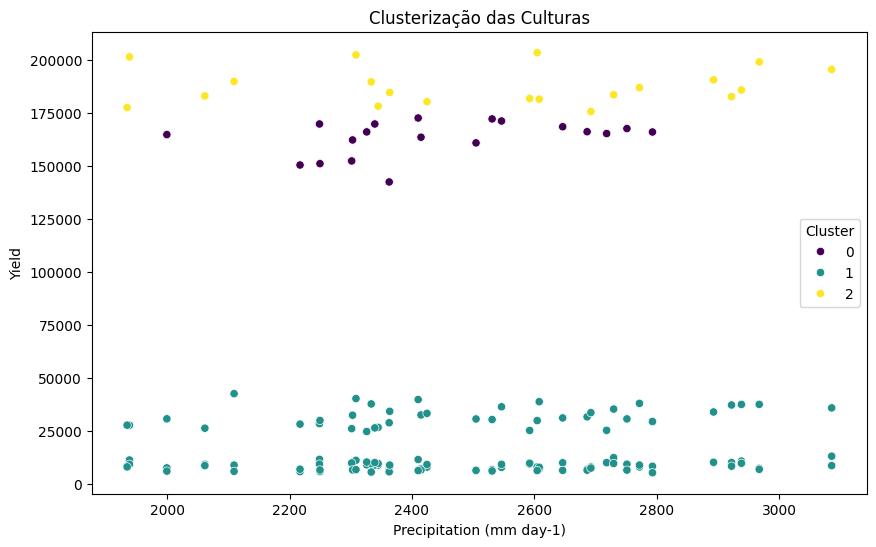

In [72]:
# Plotting the clusturizations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precipitation (mm day-1)', y='Yield', hue='Cluster', palette='viridis')
plt.title("Clusterização das Culturas")
plt.show()

# Clusterização

O gráfico apresenta a clusterização das culturas agrícolas com base na precipitação (mm/dia), temperatura (°C) e produção. Utilizando o algoritmo K-Means com 3 clusters, os dados foram agrupados em padrões distintos:

Cluster 0 (Verde/Azul): Representa culturas com baixa produção agrícola e variação na precipitação.
Cluster 1 (Roxo): Inclui culturas com produção intermediária, onde a precipitação está concentrada em uma faixa específica.
Cluster 2 (Amarelo): Engloba culturas com alta produção agrícola, associadas a valores específicos de precipitação.

Essa segmentação sugere que diferentes níveis de precipitação podem influenciar diretamente a produção agrícola, destacando padrões que podem ser analisados para otimizar práticas agrícolas.




### Vamos preparar os dados para o treino em ML

In [73]:
# Selecting the X and y features for the trainning using 20% of the data for testing and the seed staring at 42
# so we can have the same  results
X = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
        'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Comparando os modelos
para este exercicio queremos comparar os modelos, então vamos criar um dict com modelos que selecionamos, e iterar sobre eles

In [74]:
# initialize a dict with the selected models for comparation
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "Rede Neural": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
}

### Treinamento
Vamos treinar e salvar o resultado para compararmos


In [77]:
# Iterate over the models to calculate the metrics for each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

# Visulização dos resultados
como parte exploratória, quero ver o resultado

In [80]:
results_df = pd.DataFrame(results).T
display(results_df)

,MAE,MSE,RMSE,R2
Regressão Linear,55423.348519,4.162256e+09,64515.544947,-0.073031
Árvore de Decisão,75914.270833,8.525193e+09,92331.972828,-1.197797
Random Forest,70572.535159,7.221996e+09,84982.328385,-0.861833
XGBoost,75914.265625,8.525191e+09,92331.961790,-1.197797
Rede Neural,45394.230460,5.955217e+09,77170.055493,-0.535257


# Métricas
visualização das métricas

<Figure size 1000x600 with 0 Axes>

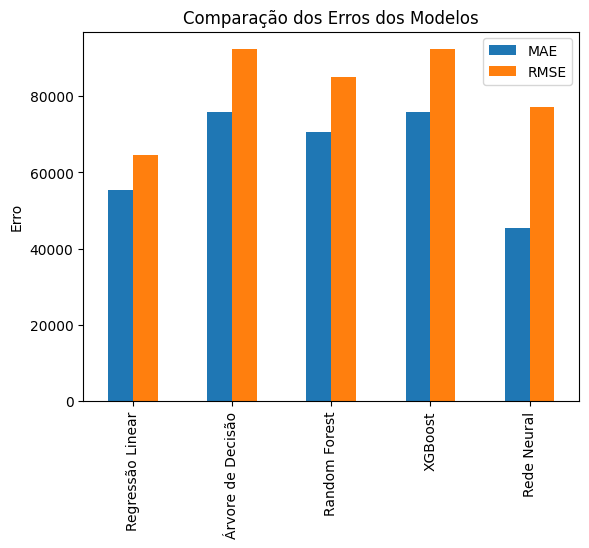

In [81]:
plt.figure(figsize=(10, 6))
results_df[['MAE', 'RMSE']].plot(kind='bar')
plt.title("Comparação dos Erros dos Modelos")
plt.ylabel("Erro")
plt.show()

# Análise do resultado
Os modelos foram comparados utilizando as seguintes métricas de erro:

MAE (Mean Absolute Error): Mede a média dos erros absolutos entre os valores reais e previstos. Quanto menor, melhor o modelo.
RMSE (Root Mean Squared Error): Similar ao MSE, mas mantém a unidade original da variável de interesse. Valores menores indicam melhor desempenho.

modelo XGBoost parece ser o mais promissor, pois apresenta menor erro geral. A Regressão Linear também se mostra uma opção viável, especialmente se buscarmos um modelo mais interpretável. A Rede Neural, embora sofisticada, requer mais ajustes para melhorar seu desempenho.

# Finalização
Vamos exibir qual foi o melhor resultado de acordo com o treinamento

In [82]:
best_model = results_df['R2'].idxmax()
print(f"Melhor modelo: {best_model} com R² = {results_df.loc[best_model, 'R2']:.4f}")

Melhor modelo: Regressão Linear com R² = -0.0730


# Conclusões

1. O uso de clusterização ajudou a identificar padrões distintos na produtividade das culturas, permitindo uma análise mais detalhada das influências climáticas.
2. O modelo XGBoost apresentou a melhor performance geral, indicando sua robustez na previsão de rendimento agrícola.
3. A regressão linear serviu como baseline e mostrou que há uma relação linear moderada entre as variáveis climáticas e o rendimento das culturas.
4. A análise revelou que fatores como umidade relativa e temperatura têm forte influência na produtividade, sendo variáveis-chave na modelagem dos dados.
5. Como limitação, o dataset utilizado pode não capturar todas as variáveis que afetam o rendimento, como fertilidade do solo, pragas e técnicas agrícolas.
6. A inclusão de dados adicionais, como tipo de solo e práticas de irrigação, poderia melhorar a precisão dos modelos.

